# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


** Check the head of df **

In [5]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [13]:
df['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [14]:
df['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [15]:
df['title'].nunique()

131

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [16]:
df['reason'] = df['title'].apply(lambda t: t.split(':')[0].strip())

** What is the most common Reason for a 911 call based off of this new column? **

In [19]:
df['reason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **
** Lets see the proportions of reasons for 911 calls by plotting %. **

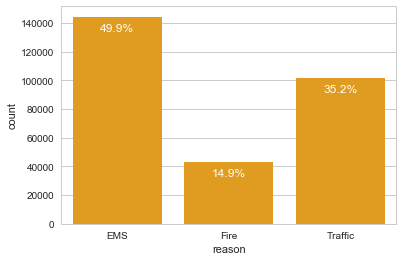

In [164]:
total = len(df)

ax = sns.countplot(x='reason', data=df, color='orange')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height - 10000,
            '{:1.1f}%'.format(height*100.0/total),
            ha="center",
            color='white') 
plt.show()

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [26]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [29]:
df.iloc[0].timeStamp

Timestamp('2015-12-10 17:10:52')

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [31]:
df['hour'] = df['timeStamp'].apply(lambda t:t.hour)
df['month'] = df['timeStamp'].apply(lambda t:t.month)
df['dayofweek'] = df['timeStamp'].apply(lambda t:t.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [33]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)

In [84]:
mmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month'] = df['month'].map(mmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

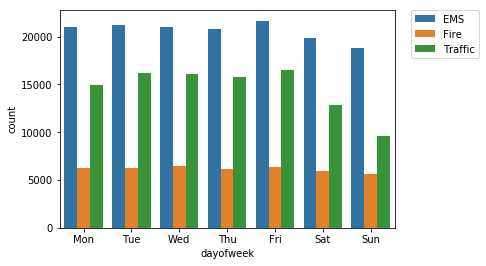

In [88]:
sns.countplot(x='dayofweek', data=df, hue='reason', order=dmap.values())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad = 0 )

**Now do the same for Month:**

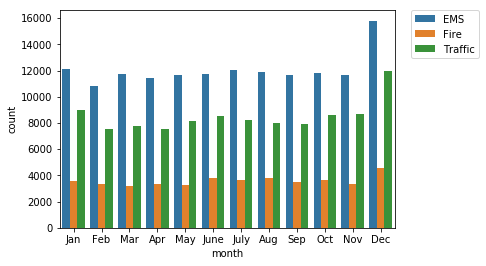

In [87]:
sns.countplot(x='month', data=df, hue='reason', order = mmap.values())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad = 0 )

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [41]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

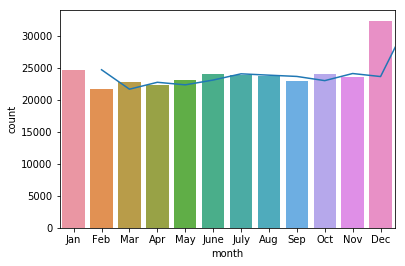

In [91]:
byMonth['lat'].plot()
sns.countplot(x='month', data = df, order=mmap.values())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [50]:
df['date'] = df['timeStamp'].apply(lambda t:t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

Text(0.5,1,u'Calls to all services')

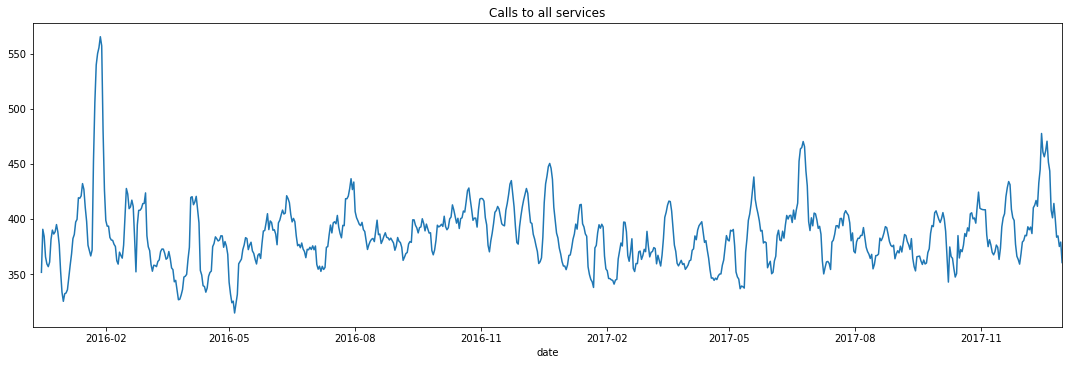

In [101]:
plt.figure(figsize=(15,5))
byDate = df.groupby('date').count()
byDate['lat'].rolling(7).mean().plot()
plt.tight_layout()
plt.title('Calls to all services')

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5,1,u'Calls to Traffic')

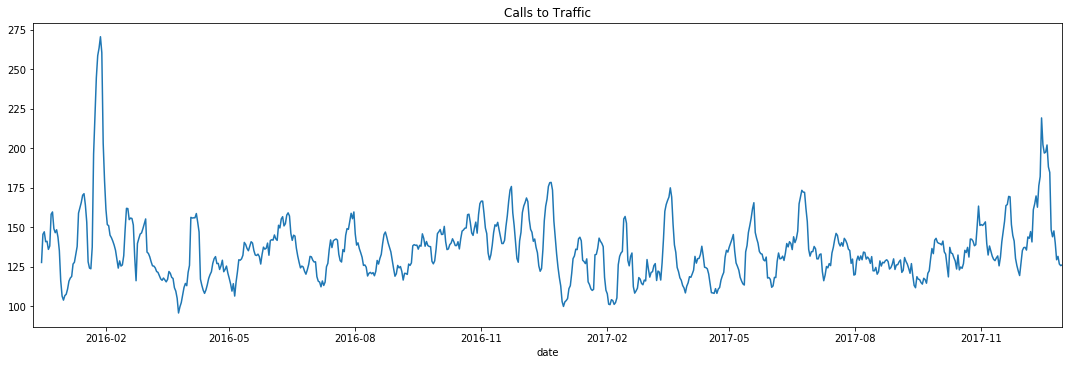

In [100]:
plt.figure(figsize=(15,5))
df[df['reason']=='Traffic'].groupby('date').count()['lat'].rolling(7).mean().plot()
plt.tight_layout()
plt.title('Calls to Traffic')

Text(0.5,1,u'Calls to Fire')

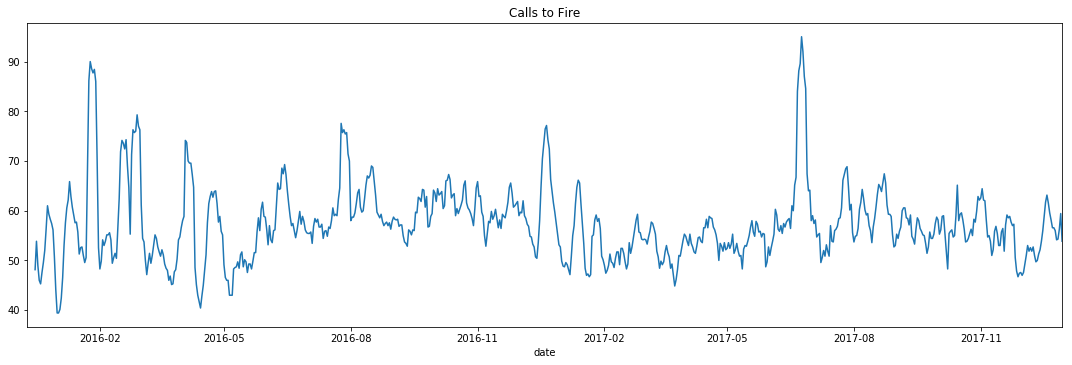

In [98]:
plt.figure(figsize=(15,5))
df[df['reason']=='Fire'].groupby('date').count()['lat'].rolling(7).mean().plot()
plt.tight_layout()
plt.title('Calls to Fire')

Text(0.5,1,u'Calls to EMS')

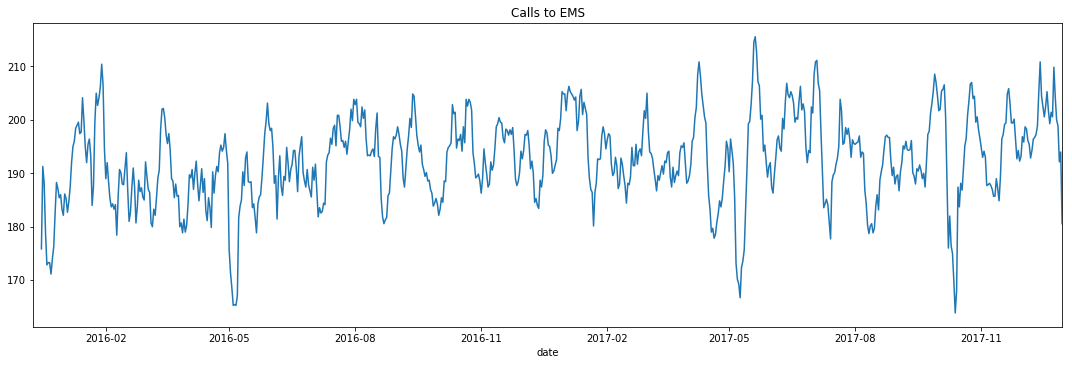

In [102]:
plt.figure(figsize=(15,5))
df[df['reason']=='EMS'].groupby('date').count()['lat'].rolling(7).mean().plot()
plt.tight_layout()
plt.title('Calls to EMS')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [105]:
tab = df.groupby(by=['dayofweek', 'hour']).count()
xtab = tab['reason'].unstack()

** Now create a HeatMap using this new DataFrame. **

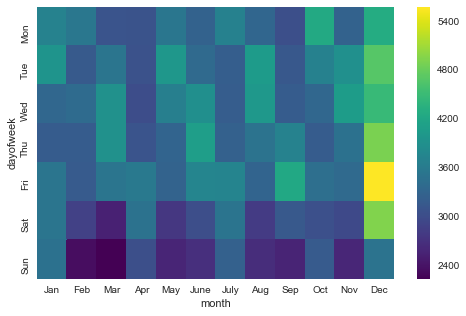

In [153]:
plt.figure(figsize=(8,5))
sns.heatmap(xtab, cmap='viridis')

** Now create a clustermap using this DataFrame. **

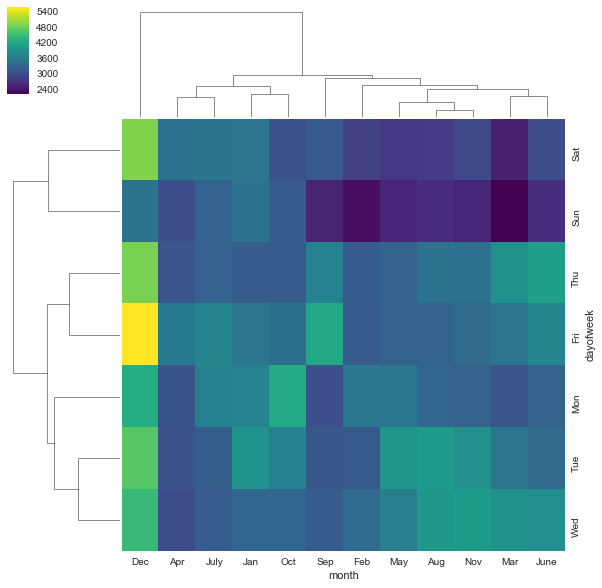

In [154]:
sns.clustermap(xtab, cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [113]:
tab = df.groupby(by=['dayofweek', 'month']).count()
xtab = tab['reason'].unstack()

# reorder rows and columns
xtab = xtab[mmap.values()]
xtab = xtab.reindex_axis(dmap.values(), axis=0)


month,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
dayofweek,,,,,,,,,,,,
Mon,3706,3552,3103,3088,3538,3264,3687,3325,3031,4250,3262,4286
Tue,3953,3160,3529,3065,3991,3376,3213,4044,3142,3689,3891,4691
Wed,3336,3381,3902,3003,3653,3880,3198,4016,3191,3338,4067,4477
Thu,3182,3189,3909,3097,3289,4095,3248,3507,3702,3189,3478,4899
Fri,3527,3171,3532,3574,3278,3747,3736,3297,4226,3433,3377,5570
Sat,3527,2871,2539,3490,2764,3024,3515,2810,3144,3042,2972,4939
Sun,3470,2339,2229,3026,2580,2679,3259,2658,2565,3172,2592,3504


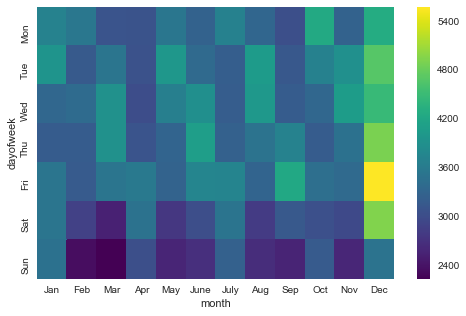

In [152]:
plt.figure(figsize=(8,5))
sns.heatmap(xtab, cmap='viridis')

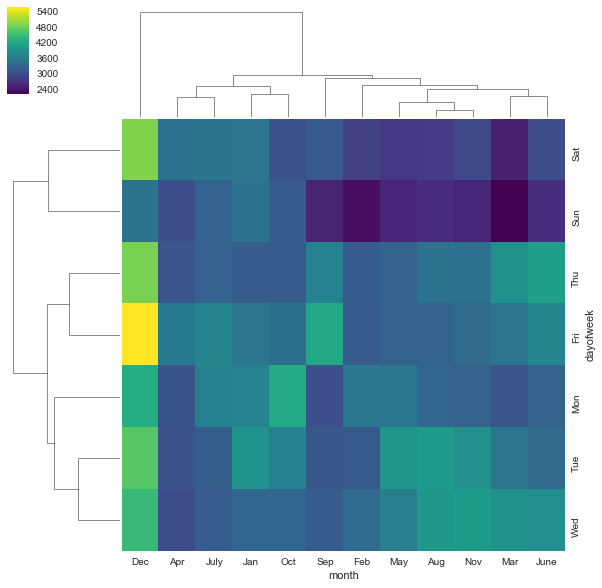

In [155]:
sns.clustermap(xtab, cmap='viridis')

**Continue exploring the Data however you see fit!**